In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.6 MB/s eta 0:00:00


In [3]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC, SVR
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions


# Support Vector Machines

## LinearSVC

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# SVC is sensityive to scale - Make sure to scale data
X, y = scale(cancer.data), cancer.target
X.shape

(569, 30)

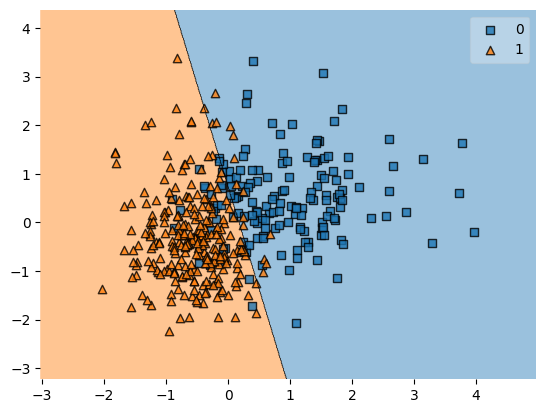

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

svm = SVC(kernel='linear',C=1.0)
svm.fit(X_train[:, :2], y_train)
plot_decision_regions(X_train[:, :2],  y_train, svm);

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


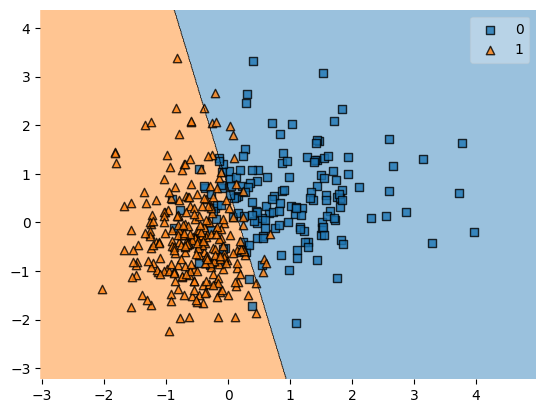

In [8]:
svm = LinearSVC(C=1.0,loss='hinge',max_iter=20000)
svm.fit(X_train[:, :2], y_train)
plot_decision_regions(X_train[:, :2],  y_train, svm);

#### Effect of Paramter C

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


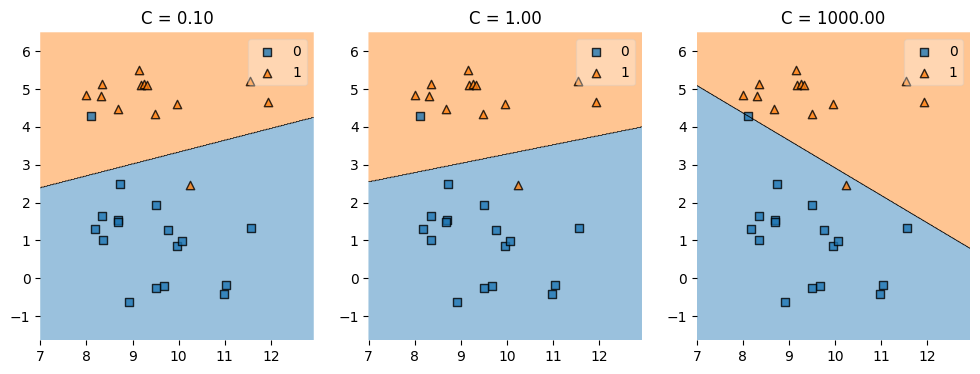

In [9]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(centers=2, random_state=4, n_samples=30)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

y[7] = 0
y[27] = 0

for ax, C in zip(axes, [1e-1, 1, 1e3]):
    svm = LinearSVC(C=C,loss='hinge',max_iter=500000,tol=0.1).fit(X,y)
    plot_decision_regions(X=X, y=y, clf=svm, ax=ax, legend=1);
    ax.set_title("C = %.2f" % C);

#### Effect of Scaling

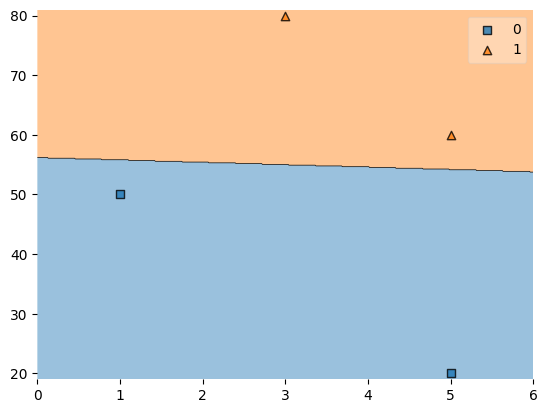

In [10]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)
plot_decision_regions(X=Xs, y=ys, clf=svm_clf, legend=1);

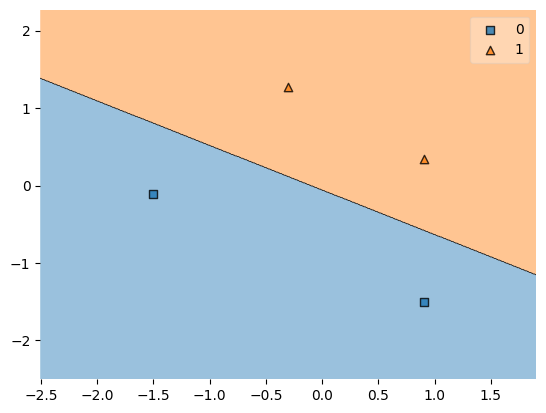

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)
plot_decision_regions(X=X_scaled, y=ys, clf=svm_clf, legend=1);

## Multiclass Data

In [12]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


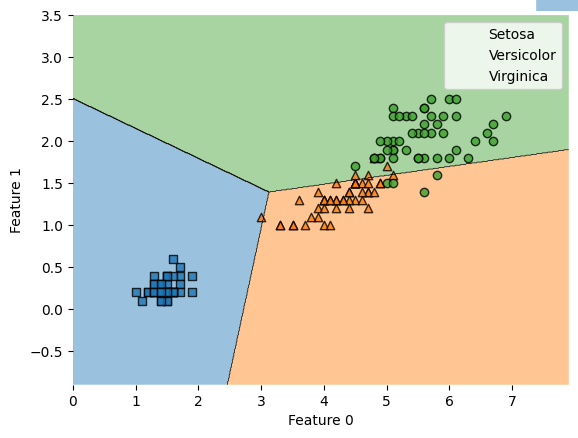

In [13]:
clf = LinearSVC(C=1.0, max_iter=10000)
clf.fit(X,y)
plot_decision_regions(X, y, clf);

plt.xlabel("Feature 0");
plt.ylabel("Feature 1");
plt.legend(['Setosa', 'Versicolor', 'Virginica']);

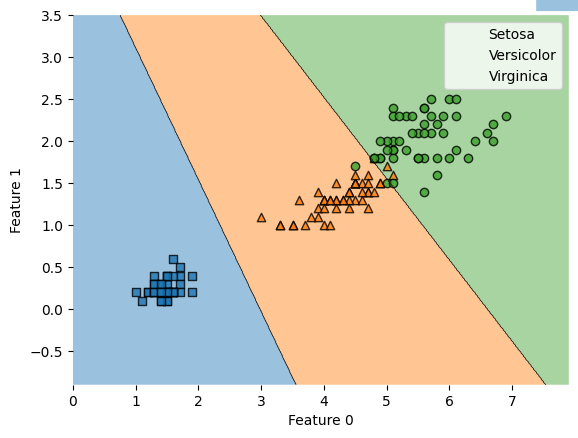

In [14]:
clf = SVC(kernel="linear", C=1.0 )
clf.fit(X,y)
plot_decision_regions(X, y, clf)

plt.xlabel("Feature 0");
plt.ylabel("Feature 1");
plt.legend(['Setosa', 'Versicolor', 'Virginica']);

In [15]:
# We have Three categories and Two Variables
# The model will give 2-coefficients for each outcome
print(clf.coef_.shape)

(3, 2)


In [16]:
print(clf.coef_)

[[-1.1        -0.7       ]
 [-0.61538458 -0.30769229]
 [-2.1829247  -2.25365588]]


In [17]:
clf.intercept_

array([ 3.27999997,  2.2923075 , 14.41486828])

## Multiclass - OVR vs OVO

#### OvR - One versus Rest

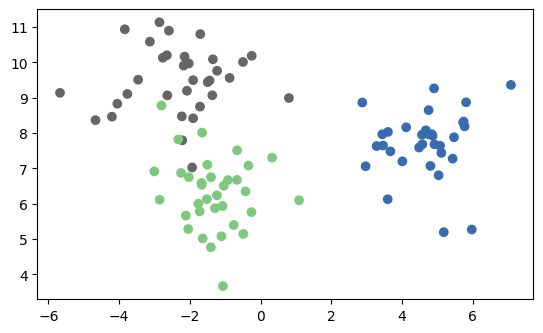

In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
ax = plt.gca()
ax.set_aspect("equal")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [19]:
### FIT CLASSIFIERS ####
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=10, max_iter = 100000).fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(3.2969173054776055, 11.504390064947744)

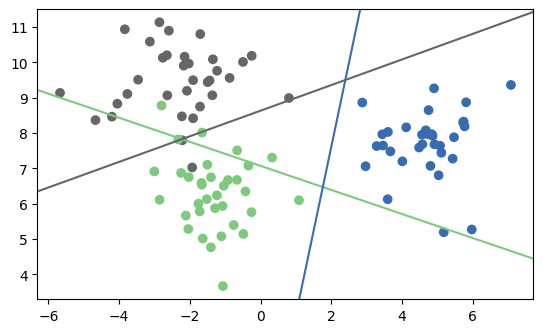

In [20]:
#### PLot lines for each Classifier
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
colors = [plt.cm.Accent(i) for i in [0, 4, 7]]
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
plt.gca().set_aspect("equal")
plt.xlim(xlim)
plt.ylim(ylim)


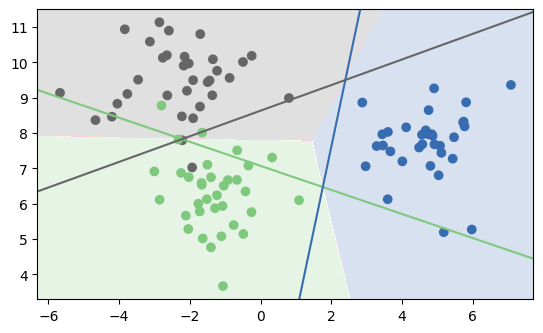

In [21]:
### Plot the Decision Boundary ####
import matplotlib as mpl

xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")


#### OvO - One Versus One

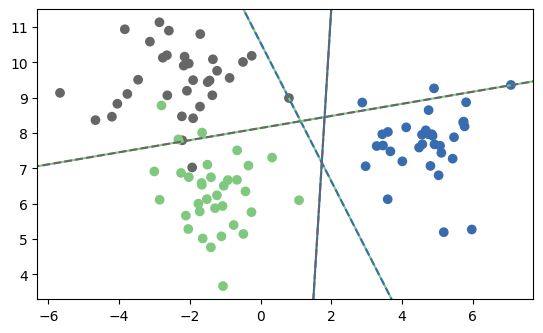

In [22]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=100).fit(X, y)
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
classes = [(0, 1), (0, 2), (1, 2)]
for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])

plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")


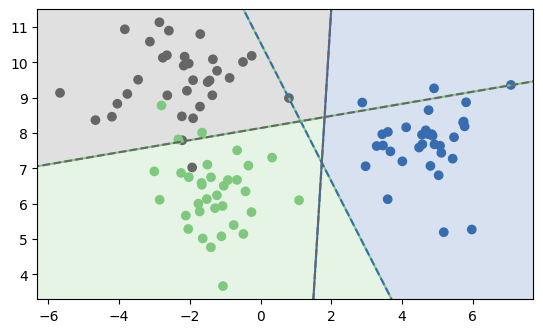

In [23]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)

svm = SVC(kernel="linear", C=100).fit(X, y)

points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")

## SVC with kernel trick

#### SVC with different Kernels

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


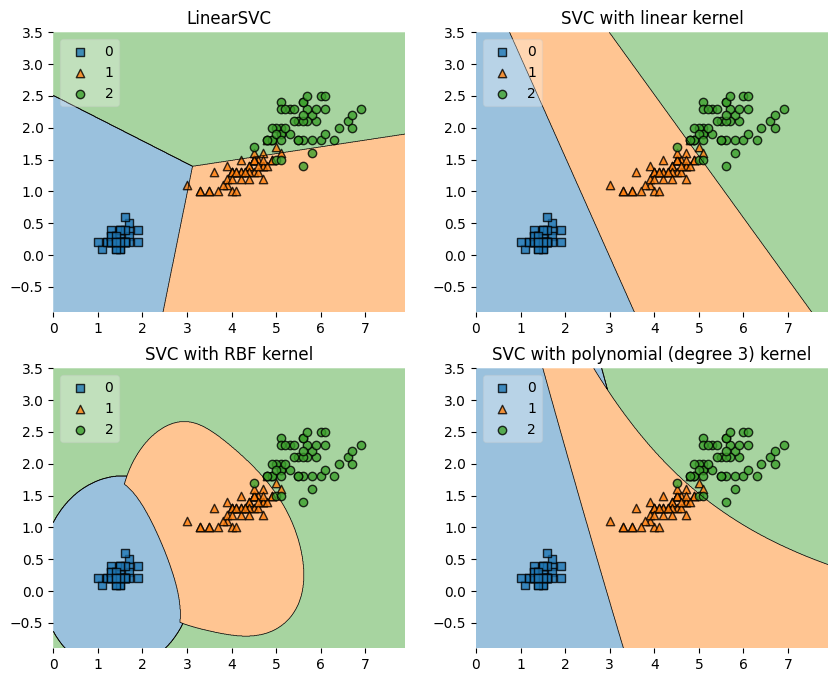

In [24]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C = 1
clf1 = LinearSVC(C=C)
clf2 = SVC(kernel='linear', C=C, max_iter = 10000)
clf3 = SVC(kernel='rbf', gamma=0.7, C=C)
clf4 = SVC(kernel='poly', degree=3, C=C)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['LinearSVC',
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

#### Effect of C parameter in Kernel SVC on decision boundary

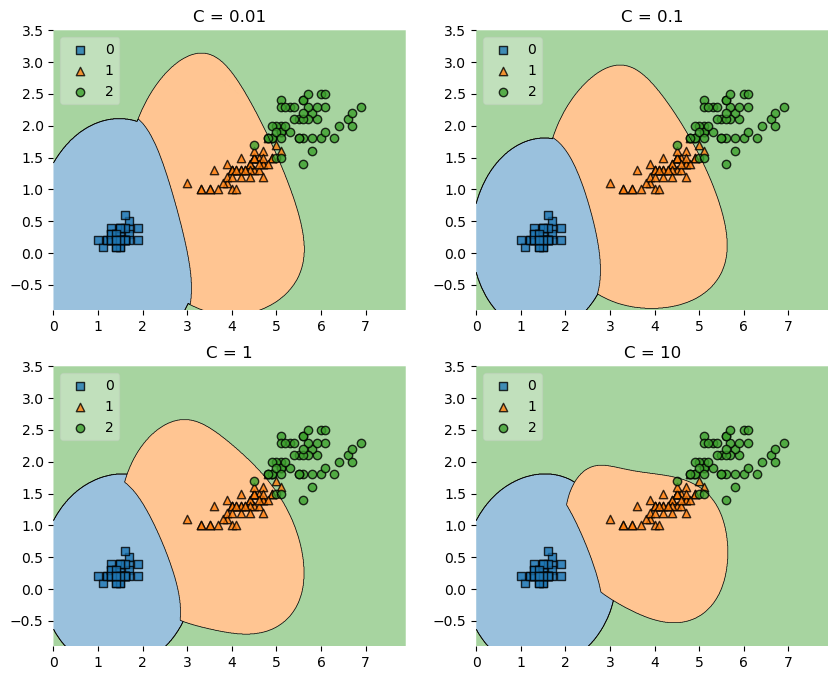

In [ ]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


gamma = 0.7
clf1 = SVC(kernel='rbf', gamma=gamma, C=0.01)
clf2 = SVC(kernel='rbf', gamma=gamma, C=0.1)
clf3 = SVC(kernel='rbf', gamma=gamma, C=1)
clf4 = SVC(kernel='rbf', gamma=gamma, C=10)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['C = 0.01',
          'C = 0.1',
          'C = 1',
          'C = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

#### Effect of gamma parameter of rbf kernel on decision boundary

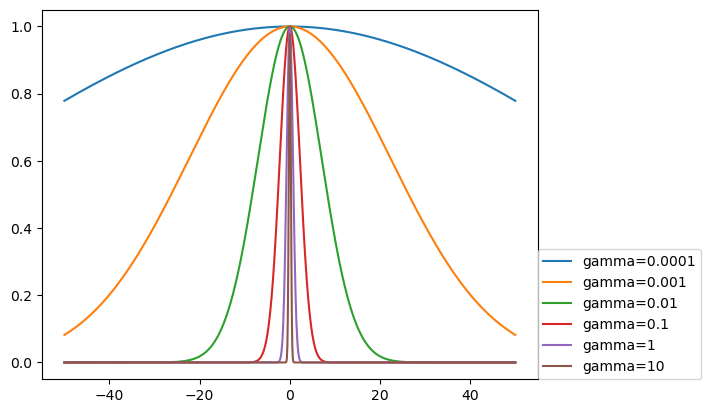

In [ ]:
line = np.linspace(-50, 50, 1000)
def rbf(gamma):
    return np.exp(-gamma * line**2)

for gamma in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
    plt.plot(line, rbf(gamma), label="gamma={}".format(gamma))
plt.legend(loc=(1, 0))

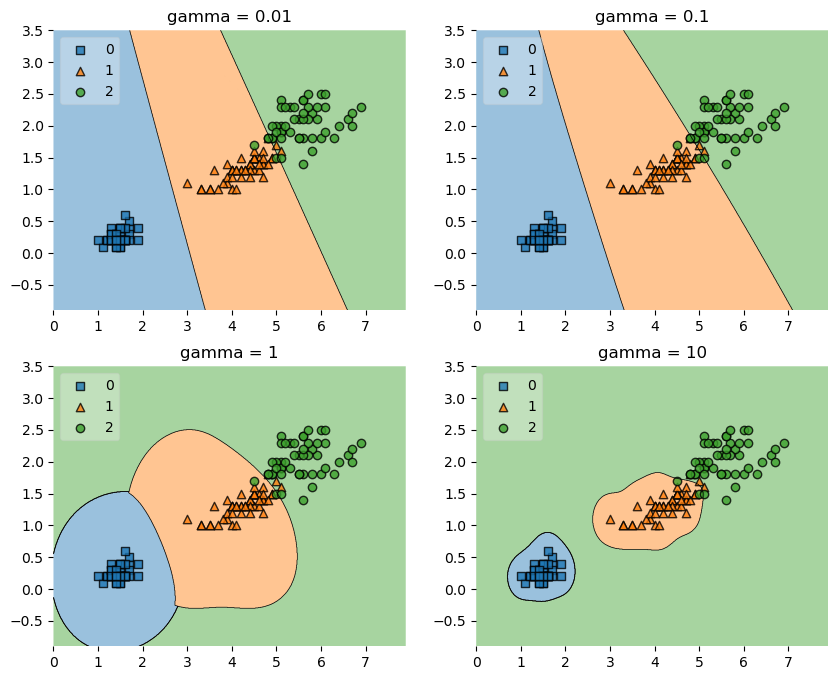

In [ ]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


C = 1
clf1 = SVC(kernel='rbf', gamma=0.01, C=C)
clf2 = SVC(kernel='rbf', gamma=0.1, C=C)
clf3 = SVC(kernel='rbf', gamma=1, C=C)
clf4 = SVC(kernel='rbf', gamma=10, C=C)


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['gamma = 0.01',
          'gamma = 0.1',
          'gamma = 1',
          'gamma = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

#### Effect of gamma paramter for Poly- Kernel on decision boundary

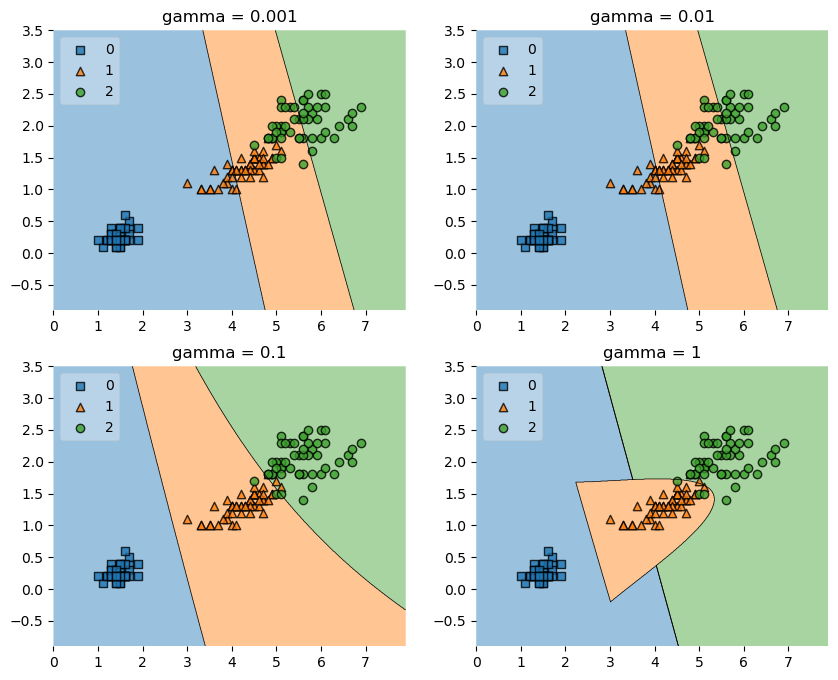

In [ ]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


C = 1
clf1 = SVC(kernel='poly', gamma=0.001, C=C)
clf2 = SVC(kernel='poly', gamma=0.01, C=C)
clf3 = SVC(kernel='poly', gamma=0.1, C=C)
clf4 = SVC(kernel='poly', gamma=1, C=C)


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['gamma = 0.001',
          'gamma = 0.01',
          'gamma = 0.1',
          'gamma = 1']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

Effect of parameter d for Poly- Kernel on decision boundary

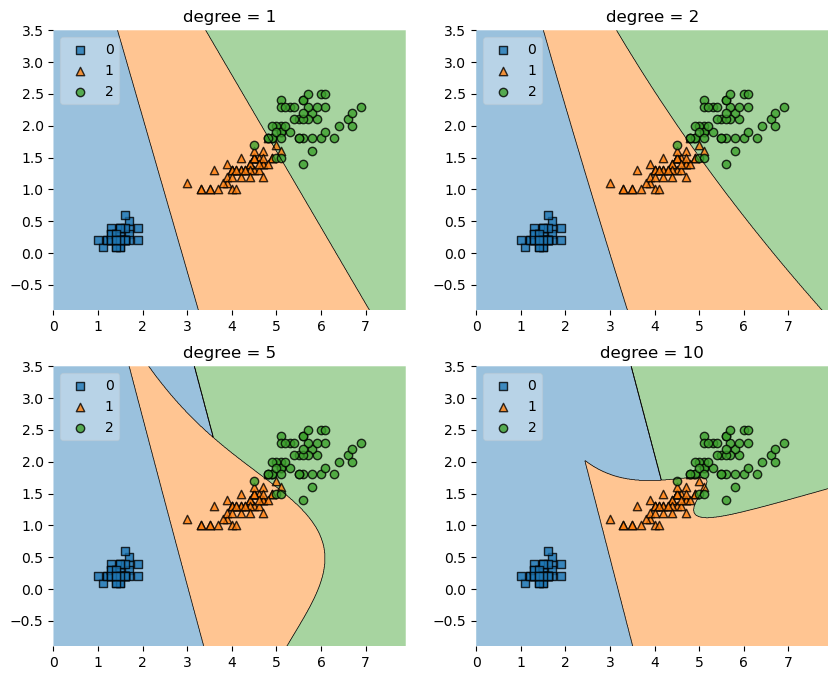

In [ ]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


C = 1
clf1 = SVC(kernel='poly', degree=1, C=C)
clf2 = SVC(kernel='poly', degree=2, C=C)
clf3 = SVC(kernel='poly', degree=5, C=C)
clf4 = SVC(kernel='poly', degree=10, C=C)


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['degree = 1',
          'degree = 2',
          'degree = 5',
          'degree = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

## SVM Estimation with GridSearch

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

#print(cancer.DESCR)

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=10)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.92
Accuracy on test set: 0.92


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svc_kernel = SVC(kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [1,10,100,1000,10000],'gamma':[0.001,0.01,0.1,1,10]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2, scoring='roc_auc')
grid_svc_kernel.fit(X_train, y_train)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_train, y_train))
print(grid_svc_kernel.best_params_)
print('best mean cross validation score: ',grid_svc_kernel.best_score_ )

train score:  0.9983082706766918
test score:  0.9983082706766918
{'C': 1, 'gamma': 0.001}
best mean cross validation score:  0.9590932914046123


## GridSearch - multiple kernels - list of  dictionaries

In [ ]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True,scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_train, y_train))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.993843984962406
test score:  0.993843984962406
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.99


## Support Vector Regression

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
# split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
# create pipeline
reg_svr_pipe = Pipeline([
    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('svr', SVR())
])
param_grid = [{'svr__kernel': ['rbf'],
               'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'svr__kernel': ['linear'],
               'svr__C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

grid_search = GridSearchCV(reg_svr_pipe, param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_train, y_train))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

List of grids:
[{'svr__kernel': ['rbf'], 'svr__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'svr__kernel': ['linear'], 'svr__C': [0.001, 0.01, 0.1, 1, 10, 100]}]


/home/harpreet/mambaforge/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

train score:  0.9649475594671194
test score:  0.9649475594671194
Best parameters: {'svr__C': 100, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
Best cross-validation score: 0.85


In [ ]:
np.set_printoptions(precision=6, suppress=True)
# using pipeline of scaler and SVC. Could also use SVC and rescale gamma
param_grid = {'svc__C': np.logspace(-3, 2, 6),
              'svc__gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
param_grid

{'svc__C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 'svc__gamma': array([0.000003, 0.000026, 0.000264, 0.002639, 0.026385, 0.263852])}